# Check the ratio at each position

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd

from dataloader import BaseDataset
from param import *


In [2]:
position_class_all = []
for i, data_dir in enumerate(ParamDir().data_list):
    data_name = str(data_dir).split('/')[-1]
    mouse_type = "KO" if "KO" in data_name else "WT"
    dataset = BaseDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    y = dataset._discretize_coords()

    classes, count = np.unique(y, return_counts=True)
    position_class_all.append([count/np.sum(count), data_name, mouse_type])

plot_data = pd.DataFrame(position_class_all, columns=["ratio", "data name", "mouse type"])



Text(0.5, 0.98, 'mean time points ratio at each position')

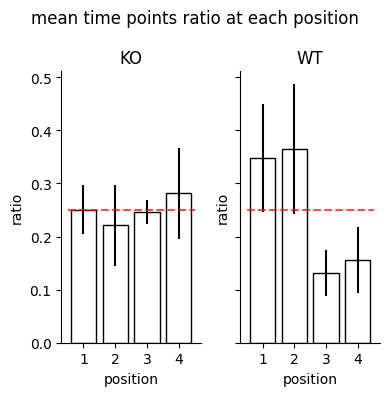

In [3]:
ind = [str(i+1) for i in range(len(plot_data["ratio"].iloc[0]))]
means = plot_data.groupby("mouse type")["ratio"].mean()
errors = [plot_data[plot_data["mouse type"]=="KO"]["ratio"].values.std(), plot_data[plot_data["mouse type"]=="WT"]["ratio"].values.std()]

fig, axes = plt.subplots(figsize=(4,4), ncols=2, sharey=True, tight_layout=True)
sns.despine()

for plot_i, ax in enumerate(axes):
    ax.bar(ind, means[plot_i], yerr=errors[plot_i], facecolor="white", edgecolor="black")

    ax.set_xlabel("position")
    ax.set_ylabel("ratio")
    title = "KO" if plot_i==0 else "WT"
    ax.set_title(title)
    ax.hlines(0.25, -.5, 3.5, linestyles="dashed", color="r", alpha=.7)

# ax.set_title("time of staying at one position")
plt.suptitle("mean time points ratio at each position")